In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('accident_train.csv')
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [3]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [4]:
df.shape    #training data shape

(10000, 12)

In [5]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

# EDA

In [6]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [7]:
features_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]

In [10]:
for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean(),4),'% missing values')

In [11]:
features_with_nan    #No NULL values

[]

## 2) Numerical features

In [12]:
numerical_feat=[feature for feature in df.columns if df[feature].dtypes!='O']

In [13]:
numerical_feat

['Safety_Score',
 'Days_Since_Inspection',
 'Total_Safety_Complaints',
 'Control_Metric',
 'Turbulence_In_gforces',
 'Cabin_Temperature',
 'Accident_Type_Code',
 'Max_Elevation',
 'Violations',
 'Adverse_Weather_Metric',
 'Accident_ID']

In [14]:
len(numerical_feat)

11

In [20]:
plt.figure(figsize=(10,20))

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

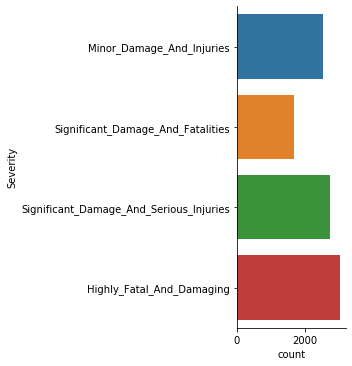

In [22]:
sns.catplot(y='Severity',kind='count',data=df)
plt.show()

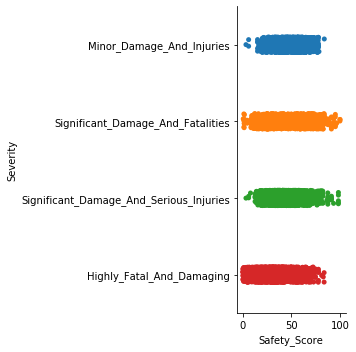

In [23]:
sns.catplot(x='Safety_Score',y='Severity',data=df)

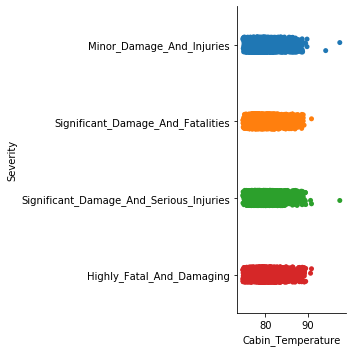

In [24]:
sns.catplot(x='Cabin_Temperature',y='Severity',data=df)

## Analyze numerical variables distribution Histogram

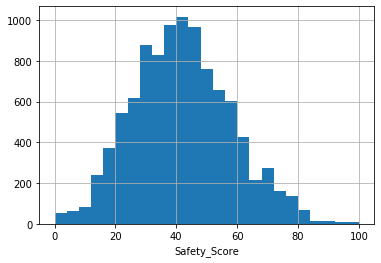

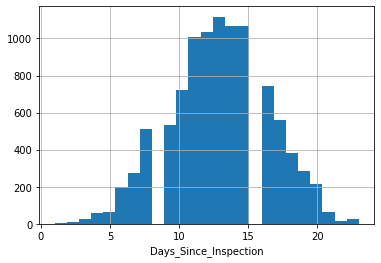

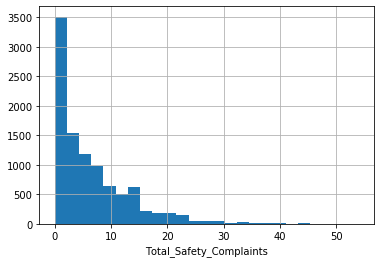

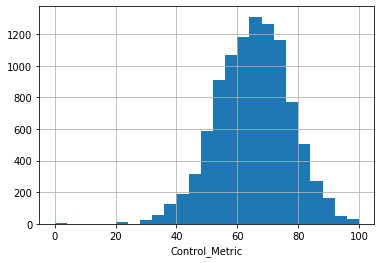

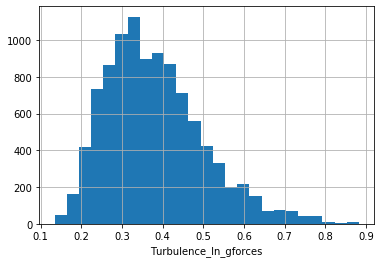

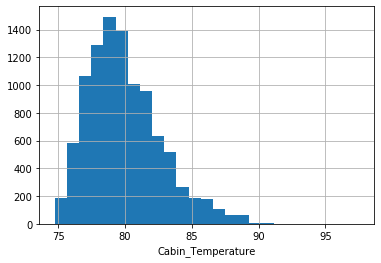

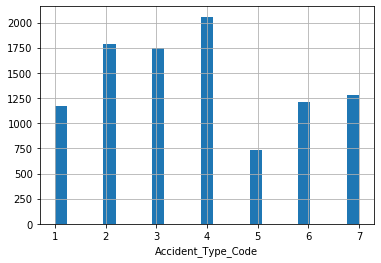

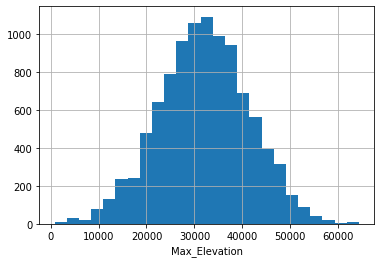

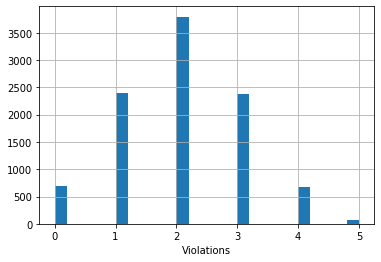

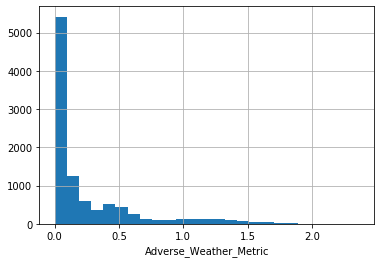

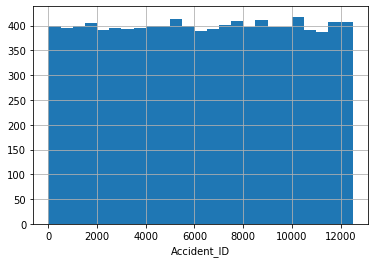

In [27]:
for feature in numerical_feat:      
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

## Outlier analysis using boxplot

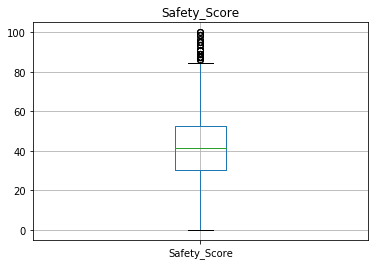

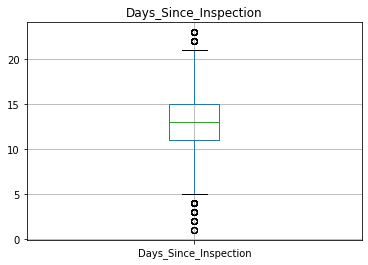

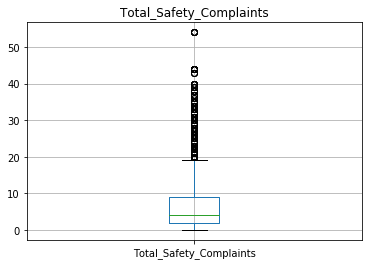

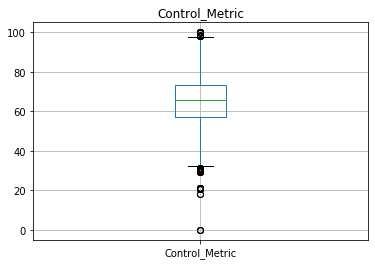

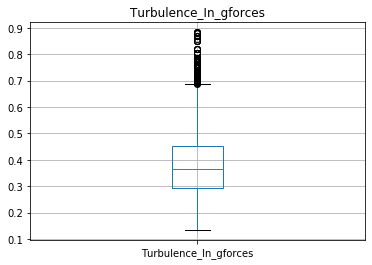

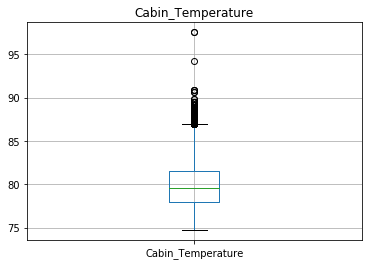

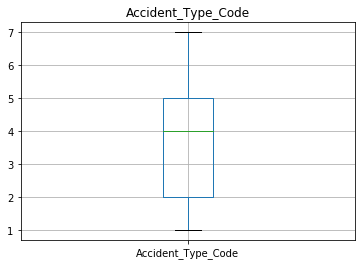

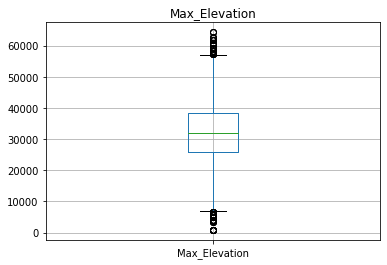

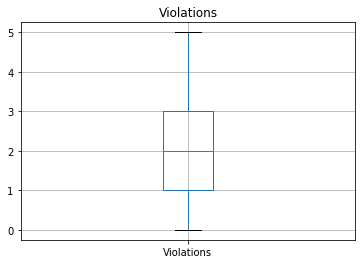

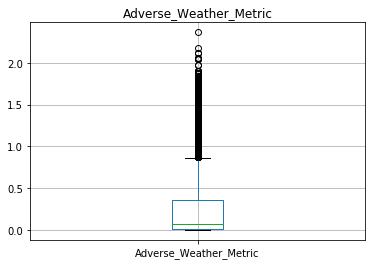

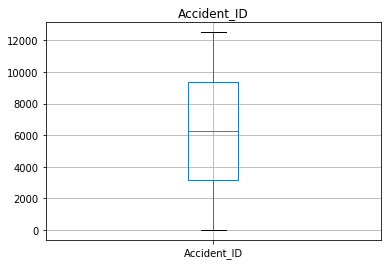

In [29]:
for feature in numerical_feat:
    data=df.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

### Categorical variable

In [30]:
categorical_feat=[feature for feature in df.columns if df[feature].dtypes=='O']

In [31]:
categorical_feat    #target variable

['Severity']

In [33]:
print("The number of categories in target variable is", len(df['Severity'].unique()))

The number of categories in target variable is 4


In [34]:
df.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [35]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [36]:
df['Violations'].value_counts()

2    3793
1    2398
3    2376
0     696
4     675
5      62
Name: Violations, dtype: int64

In [37]:
df['Accident_Type_Code'].value_counts()

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

In [38]:
df['Violations'].dtypes

dtype('int64')

In [39]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [40]:
df['Violations']=df['Violations'].astype('object')

In [41]:
df['Violations'].dtypes

dtype('O')

In [42]:
df['Violations'].value_counts()

2    3793
1    2398
3    2376
0     696
4     675
5      62
Name: Violations, dtype: int64

In [44]:
Violations=df[['Violations']]
Violations=pd.get_dummies(Violations,drop_first=True)

In [46]:
df_final=pd.concat([df,Violations],axis=1)

In [47]:
df_final

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Violations_1,Violations_2,Violations_3,Violations_4,Violations_5
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570,0,0,1,0,0
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128,0,1,0,0,0
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181,0,0,1,0,0
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946,1,0,0,0,0
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.36341,2,0.026150,11493,0,1,0,0,0
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.91690,2,0.074898,305,0,1,0,0,0
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.99630,3,0.168173,612,0,0,1,0,0
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.41925,2,0.026381,4963,0,1,0,0,0


In [48]:
X=df_final.drop(['Severity','Accident_ID'],axis=1)

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
label=LabelEncoder()

In [57]:
y=df_final['Severity']

In [58]:
y=label.fit_transform(y)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=201)

In [61]:
classifier = GradientBoostingClassifier(n_estimators=100,
                                 max_depth=10,
                                 learning_rate=0.2, 
                                 random_state=101)

In [62]:
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=10, random_state=101)

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       597
           1       0.96      0.97      0.96       531
           2       0.96      0.96      0.96       340
           3       0.96      0.95      0.96       532

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [65]:
df_final

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Violations_1,Violations_2,Violations_3,Violations_4,Violations_5
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570,0,0,1,0,0
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128,0,1,0,0,0
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181,0,0,1,0,0
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946,1,0,0,0,0
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.36341,2,0.026150,11493,0,1,0,0,0
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.91690,2,0.074898,305,0,1,0,0,0
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.99630,3,0.168173,612,0,0,1,0,0
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.41925,2,0.026381,4963,0,1,0,0,0


# Test data

In [66]:
df_test=pd.read_csv('accident_test.csv')
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.72439,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.80557,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.92548,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.18634,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.52541,2,0.483696,21


In [67]:
df_test.shape

(2500, 11)

In [68]:
df_test.dtypes

Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [70]:
df_test.isnull().mean()

Safety_Score               0.0
Days_Since_Inspection      0.0
Total_Safety_Complaints    0.0
Control_Metric             0.0
Turbulence_In_gforces      0.0
Cabin_Temperature          0.0
Accident_Type_Code         0.0
Max_Elevation              0.0
Violations                 0.0
Adverse_Weather_Metric     0.0
Accident_ID                0.0
dtype: float64

In [71]:
df_test['Violations']=df_test['Violations'].astype('object')